In [ ]:


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import SMOTE


sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

print("✅ Library siap dipakai!")


✅ Library siap dipakai!


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/data-bank.csv'

df = pd.read_csv(file_path)

print("✅ Data berhasil dibaca!")
print("Jumlah baris   :", df.shape[0])
print("Jumlah kolom   :", df.shape[1])
print("\n5 baris pertama:")
display(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Data berhasil dibaca!
Jumlah baris   : 6819
Jumlah kolom   : 96

5 baris pertama:


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
# === Data Understanding ===

print("Nama semua kolom:\n", df.columns.tolist())


TARGET_COLUMN = 'Bankrupt?'

if TARGET_COLUMN not in df.columns:
    raise ValueError(f"Kolom target '{TARGET_COLUMN}' tidak ditemukan. Cek lagi nama kolomnya!")

print("\nInfo dataset:")
print(df.info())

print("\nStatistik deskriptif:")
display(df.describe())

print("\nDistribusi target:")
print(df[TARGET_COLUMN].value_counts())
print("\nDistribusi target (persentase):")
print(df[TARGET_COLUMN].value_counts(normalize=True) * 100)


Nama semua kolom:
 ['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000



Distribusi target:
Bankrupt?
0    6599
1     220
Name: count, dtype: int64

Distribusi target (persentase):
Bankrupt?
0    96.77372
1     3.22628
Name: proportion, dtype: float64


Jumlah fitur numerik: 95
Beberapa fitur numerik: [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)']


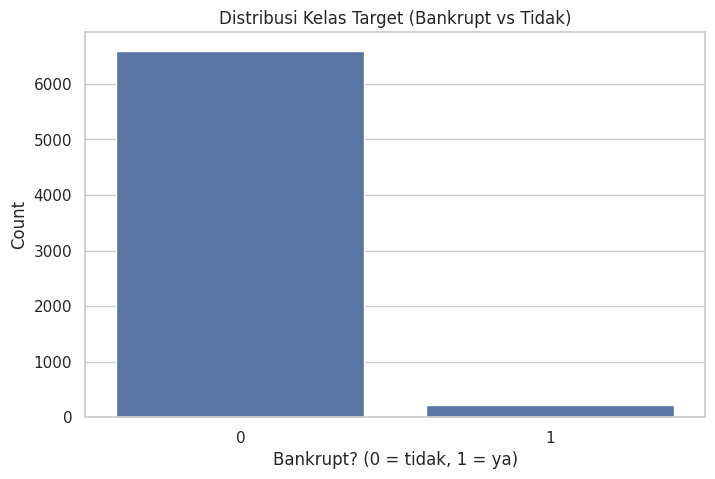

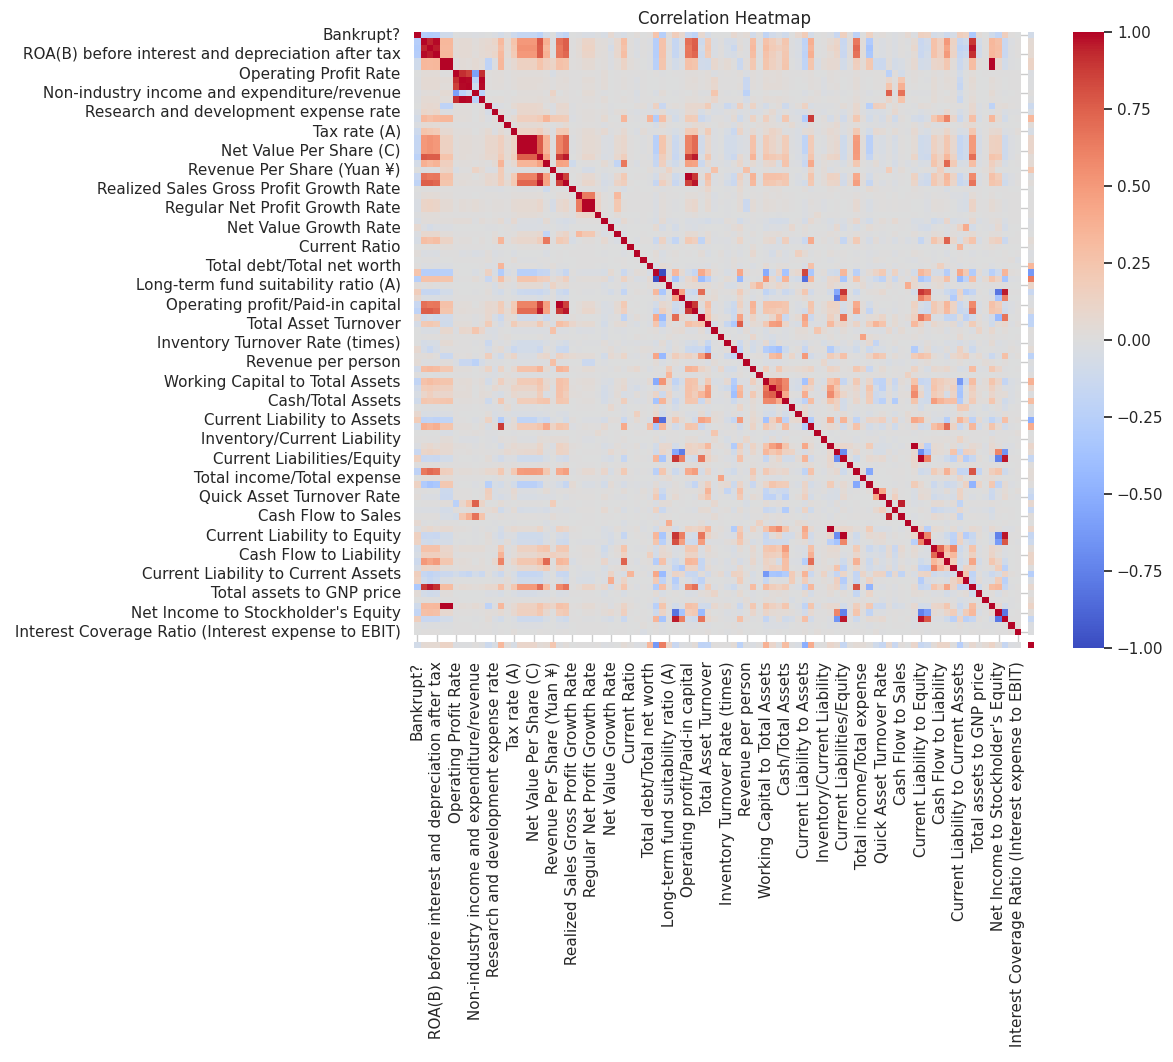

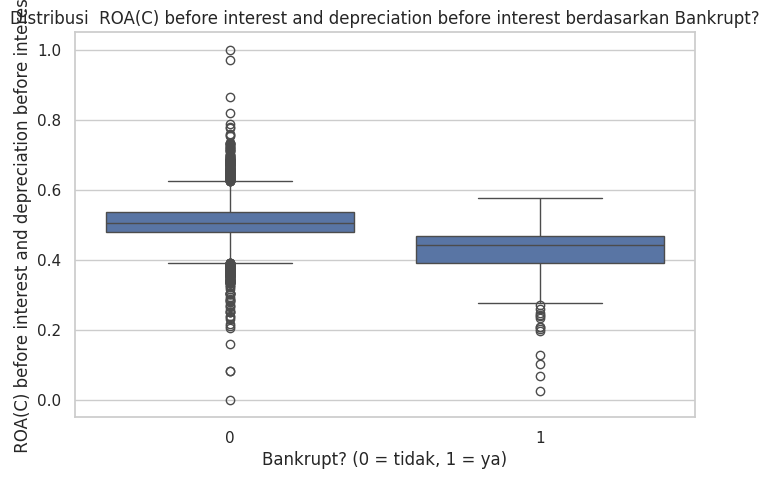

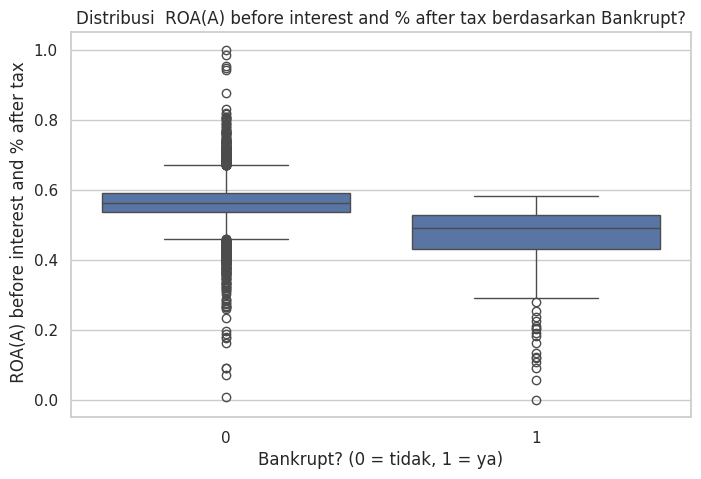

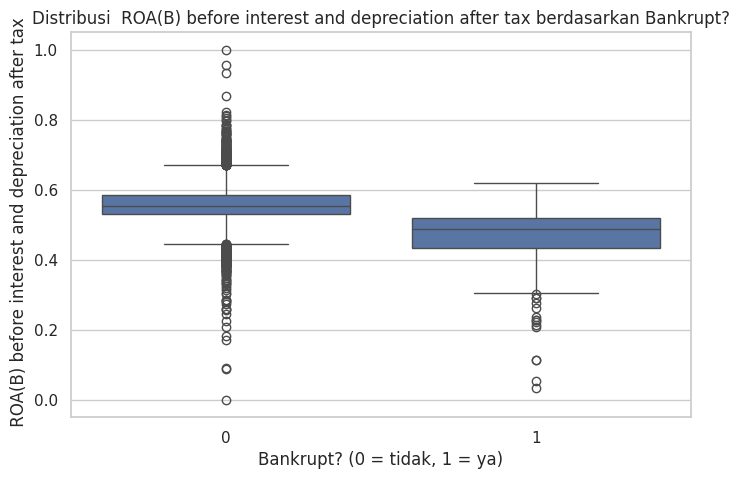

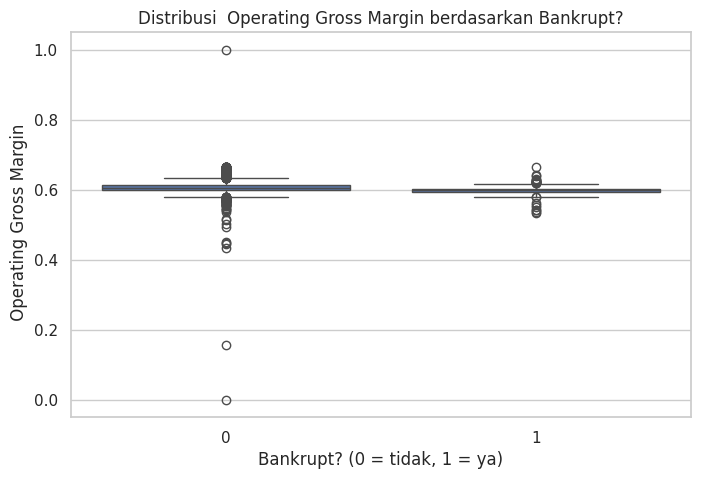

In [ ]:
# === Cell 4: Exploratory Data Analysis (EDA) ===


X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]


numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
print("Jumlah fitur numerik:", len(numeric_cols))
print("Beberapa fitur numerik:", numeric_cols[:10])


plt.figure()
sns.countplot(x=y)
plt.title("Distribusi Kelas Target (Bankrupt vs Tidak)")
plt.xlabel("Bankrupt? (0 = tidak, 1 = ya)")
plt.ylabel("Count")
plt.show()


df_corr = df.copy()
df_corr[TARGET_COLUMN] = y

corr = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


sample_features = numeric_cols[:4]

for col in sample_features:
    plt.figure()
    sns.boxplot(x=y, y=df[col])
    plt.title(f"Distribusi {col} berdasarkan Bankrupt?")
    plt.xlabel("Bankrupt? (0 = tidak, 1 = ya)")
    plt.ylabel(col)
    plt.show()


In [ ]:

print("Jumlah missing value per kolom:")
print(df.isna().sum())


for col in numeric_cols:
    if df[col].isna().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

print("\nSetelah imputasi, missing value per kolom:")
print(df.isna().sum())


class_counts = y.value_counts()
class_percent = y.value_counts(normalize=True) * 100

print("\nDistribusi Kelas:")
print(class_counts)
print("\nDistribusi Kelas (persentase):")
print(class_percent)


min_class_ratio = class_percent.min()
if min_class_ratio < 30:
    print("\n⚠️ Data TIDAK balance (imbalance). Perlu penanganan, misalnya SMOTE.")
else:
    print("\n✅ Data cukup balance.")



Jumlah missing value per kolom:
Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

Setelah imputasi, missing value per kolom:
Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and dep

In [ ]:

from imblearn.over_sampling import SMOTE


X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test :", X_test.shape)


print("\nDistribusi kelas sebelum SMOTE (train):")
print(y_train.value_counts())


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nDistribusi kelas setelah SMOTE (train):")
print(y_train_res.value_counts())


Ukuran X_train: (5455, 95)
Ukuran X_test : (1364, 95)

Distribusi kelas sebelum SMOTE (train):
Bankrupt?
0    5279
1     176
Name: count, dtype: int64

Distribusi kelas setelah SMOTE (train):
Bankrupt?
0    5279
1    5279
Name: count, dtype: int64


In [ ]:


scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

print("✅ Data untuk ANN sudah discale.")


✅ Data untuk ANN sudah discale.


In [ ]:

dt_clf = DecisionTreeClassifier(
    max_depth=None,
    random_state=42
)
dt_clf.fit(X_train_res, y_train_res)


rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train_res, y_train_res)


ann_clf = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)
ann_clf.fit(X_train_res_scaled, y_train_res)

print("✅ Semua model sudah selesai ditraining.")


✅ Semua model sudah selesai ditraining.



=== Decision Tree ===
Accuracy : 0.9318
Precision: 0.2621
Recall   : 0.6136
F1-score : 0.3673

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1320
           1       0.26      0.61      0.37        44

    accuracy                           0.93      1364
   macro avg       0.62      0.78      0.67      1364
weighted avg       0.96      0.93      0.94      1364



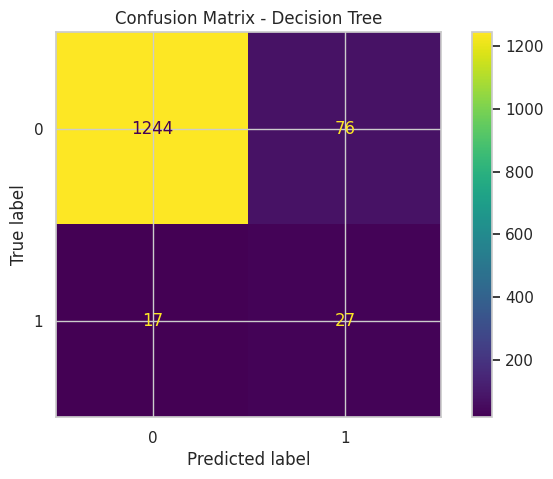


=== Random Forest ===
Accuracy : 0.9611
Precision: 0.4286
Recall   : 0.6136
F1-score : 0.5047

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1320
           1       0.43      0.61      0.50        44

    accuracy                           0.96      1364
   macro avg       0.71      0.79      0.74      1364
weighted avg       0.97      0.96      0.96      1364



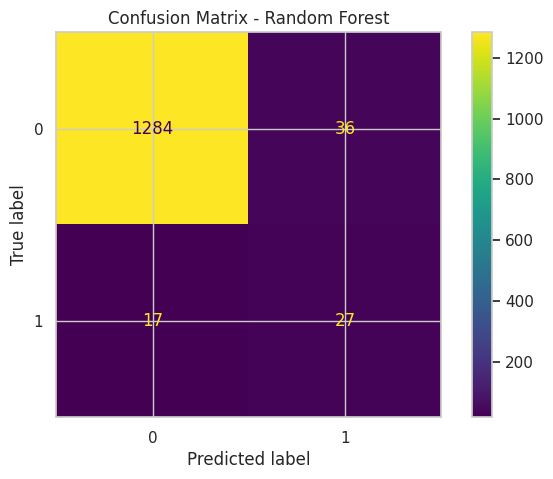


=== ANN (MLP) ===
Accuracy : 0.9560
Precision: 0.3462
Recall   : 0.4091
F1-score : 0.3750

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1320
           1       0.35      0.41      0.38        44

    accuracy                           0.96      1364
   macro avg       0.66      0.69      0.68      1364
weighted avg       0.96      0.96      0.96      1364



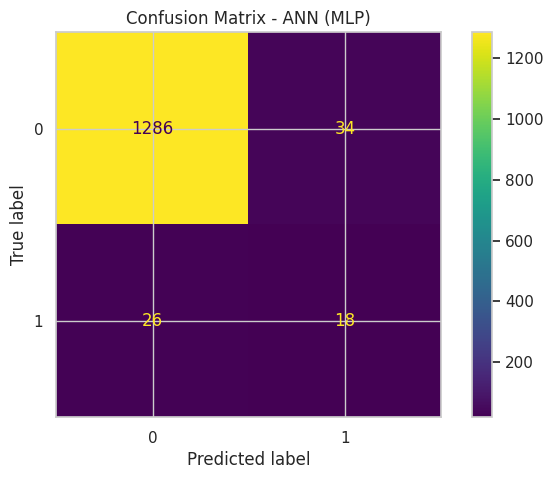


Ringkasan performa model:


,model,accuracy,precision,recall,f1
0,Decision Tree,0.931818,0.262136,0.613636,0.367347
1,Random Forest,0.961144,0.428571,0.613636,0.504673
2,ANN (MLP),0.956012,0.346154,0.409091,0.375000


In [ ]:
def evaluate_model(name, model, X_test_input, y_test_true):
    """
    name: nama model (string)
    model: objek model terlatih
    X_test_input: fitur test (bisa scaled / tidak)
    y_test_true: label asli
    """
    y_pred = model.predict(X_test_input)

    acc = accuracy_score(y_test_true, y_pred)
    prec = precision_score(y_test_true, y_pred, zero_division=0)
    rec = recall_score(y_test_true, y_pred, zero_division=0)
    f1 = f1_score(y_test_true, y_pred, zero_division=0)

    print(f"\n=== {name} ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test_true, y_pred, zero_division=0))


    cm = confusion_matrix(y_test_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    return {
        "model": name,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1
    }


results = []
results.append(evaluate_model("Decision Tree", dt_clf, X_test, y_test))
results.append(evaluate_model("Random Forest", rf_clf, X_test, y_test))
results.append(evaluate_model("ANN (MLP)", ann_clf, X_test_scaled, y_test))

results_df = pd.DataFrame(results)
print("\nRingkasan performa model:")
display(results_df)


Top 10 fitur paling penting:


,feature,importance
35,Total debt/Total net worth,0.059495
85,Net Income to Total Assets,0.054480
18,Persistent EPS in the Last Four Seasons,0.054060
7,After-tax net Interest Rate,0.052674
39,Borrowing dependency,0.050831
9,Continuous interest rate (after tax),0.044860
67,Retained Earnings to Total Assets,0.041668
89,Net Income to Stockholder's Equity,0.028049
90,Liability to Equity,0.027148
37,Net worth/Assets,0.026366



📌 5 fitur yang paling mempengaruhi kebangkrutan bank:
-  Total debt/Total net worth (importance = 0.0595)
-  Net Income to Total Assets (importance = 0.0545)
-  Persistent EPS in the Last Four Seasons (importance = 0.0541)
-  After-tax net Interest Rate (importance = 0.0527)
-  Borrowing dependency (importance = 0.0508)


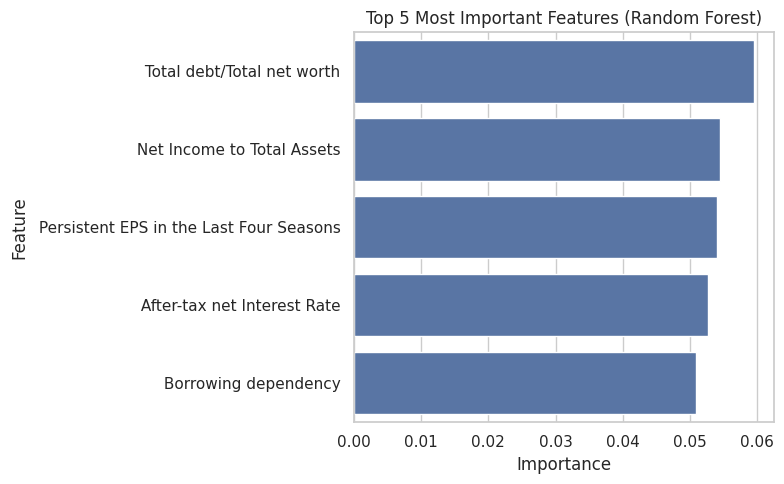

In [ ]:
importances = rf_clf.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print("Top 10 fitur paling penting:")
display(feat_imp.head(10))

top_5 = feat_imp.head(5)
print("\n📌 5 fitur yang paling mempengaruhi kebangkrutan bank:")
for i, row in top_5.iterrows():
    print(f"- {row['feature']} (importance = {row['importance']:.4f})")

plt.figure(figsize=(8, 5))
sns.barplot(x="importance", y="feature", data=top_5)
plt.title("Top 5 Most Important Features (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
